# BigMart Insights in 2013: Exploring Retail Success Factors

## Research Questions

1. **How does the item type impact sales?**
   Understanding the impact of item type on sales is crucial for retailers to stock products that meet customer demands. By analyzing this relationship, retailers can optimize product mix and adjust their offerings to align with customer preferences.

2. **How does the age of the store impact sales?**
   The age of a store (as indicated by its establishment year) could be a factor that impacts sale volumes. This question explores whether older stores, which may have a more established customer base, tend to have higher sales compared to newer stores.

3. **What is the optimal retail strategy for maximizing sales?**
   Given the data on product and store attributes, what is the optimal retail strategy for maximizing sales at each store location? This could include factors like pricing strategy and outlet type.

4. **What are the geographic variations in product preferences?**
   Customer buying preferences could differ among various cities or regions, and how does this affect product sales across different store locations? Understanding this can help retailers localize their product offerings and pricing strategies to suit the preferences of their customer base in each region.

## Motivation

It’s important to understand the key factors that drive sales in retail environments because it can help businesses improve their strategies for product stocking, pricing, and marketing. This dataset provides the opportunity to explore how product and store characteristics affect sales, offering insights that can help BigMart stores increase profitability and gain a better understanding of customer behaviors. The analysis will also reveal geographic variations in customer preferences, which can help localize the strategies.


## Challenge Goals

**New Library (plotly)**: Plotly will be used for creating interactive plots. For example, in research question 2, a scatter plot will be used to visualize the relationship between outlet age and sales volume. Scipy will be used for hypothesis statistical testing (one-way p-test)

**Statistical Hypothesis Testing**: Implement a statistical hypothesis test to confirm or refute the hypothesis that there's a significant difference in sales among different tiers of outlet locations, given that major cities fall into the first tier while the second and third tier have lower populations and more room for development according to Investopedia. This can provide insights into the impact of location on sales.

## Collaboration and Conduct

Students are expected to follow Washington state law on the [Student Conduct Code for the University of Washington](https://www.washington.edu/admin/rules/policies/WAC/478-121TOC.html). In this course, students must:

- Indicate on your submission any assistance received, including materials distributed in this course.
- Not receive, generate, or otherwise acquire any substantial portion or walkthrough to an assessment.
- Not aid, assist, attempt, or tolerate prohibited academic conduct in others.

Update the following code cell to include your name and list your sources. If you used any kind of computer technology to help prepare your assessment submission, include the queries and/or prompts. Submitted work that is not consistent with sources may be subject to the student conduct process.

In [1]:
your_name = "An Dao"
sources = [
    "groupby and indexing notebook",
    "data settings notebook",
    "dissolve, intersect, and join notebook",
    "pokemon assignment",
    "search assignment",
    "primer assignment",
    "education assignment",
    "https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html",
    "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html",
    "https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/",
    "https://plotly.com/python/getting-started/",
    "https://edstem.org/us/courses/56782/discussion/5002658",
    "https://www.investopedia.com/terms/r/real-estate-tier-classifications-tier-1-tier-2-and-tier-3.asp"
    
]

assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

## Data Setting and Methods

### Data Settings

**Dataset link:** [BigMart Product Sales Factors](https://www.kaggle.com/datasets/thedevastator/bigmart-product-sales-factors)
The dataset used for this analysis contains data on 1559 products across 10 different store locations in various cities, all collected in 2013 by BigMart and was published by Zenodo. It includes information on products, stores, and sale volumes for each product. Each row of the dataset represents a product.

There are some complications with the dataset:
- **Temporal Relevance:** This data was collected in 2013, which only accurately reflects the trend in 2013 and might not fully reflect the current trends. This potentially affects the relevance of some insights.
- **Missing Values:** Some data have missing values and there are inconsistencies in terms of naming conventions which require strategies for removal or modification.
- **Lack of Specific Attributes:** There are only attributes like `Item_Identifier` and `Item_Type` that give an idea on what the item is. However, the lack of an attribute called `Item_Name` prevents us from accurately identifying what the item is exactly, which could’ve added to the depth of research.

### Methods
**Research Question 1**
   Filter the sales data by item type and plot total sales by item type using seaborn barplot. This will allow me to see which item type is populat and what is not.

**Research Question 2**
   Calculate the store age using the current year and establishment year then plot sales versus store age using Plotly scatter plot then look at the correlation.

**Research Question 3**
   Use seaborn scatter plot for Item MRP vs Total Sales and bar plot for Outlet Size vs Total Sales. This will allow me to analyze the relationship between item price and total sales, and outlet size and total sales to come up with an optimal retail strategy.

**Research Question 4**
   Group data by outlet location type. Then, perform one-way ANOVA test to see whether there's a significant difference between sales among different tiers. Plots average sales by outlet location type using seaborn bar plot for reference and comparison.


In [2]:
!  pip install plotly==5.22.0
!  pip3 install scipy

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import io
import doctest
from pprint import pprint

In [4]:
data = pd.read_csv("data.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2349.547110
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1892.981544
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,4533.564958


In [5]:
testing = pd.read_csv(io.StringIO(("""
Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDE40,,Regular,0.098663652,Dairy,62.9194,OUT027,1985,Medium,Tier 3,Supermarket Type3,2105.2596
FDX49,,reg,0.101338651,Dairy,232.63,OUT027,1985,Medium,Tier 3,Supermarket Type3,5359.69
NCM53,18.75,Low Fat,0.052146456,Health and Hygiene,104.628,OUT045,2002,,Tier 2,Supermarket Type1,745.696
FDN57,18.25,Low Fat,0.054344186,Snack Foods,140.2154,OUT045,2002,,Tier 2,Supermarket Type1,1701.7848
FDI19,15.1,low fat,0.052339069,Meat,242.7512,OUT046,1997,Small,Tier 1,Supermarket Type1,4119.9704
FDF24,15.5,Regular,0.042464962,Meat,81.5934,OUT010,1998,,Tier 3,Grocery Store,327.5736
FDG52,13.65,Low Fat,0.065732883,Frozen Foods,45.7402,OUT049,1999,Medium,Tier 1,Supermarket Type1,780.9834
DRF36,16.1,LF,0.023625114,Frozen Foods,189.3846,OUT045,2002,,Tier 2,Supermarket Type1,3630.6074
"""
)))                     
testing

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDE40,NaN,Regular,0.098664,Dairy,62.9194,OUT027,1985,Medium,Tier 3,Supermarket Type3,2105.2596
1,FDX49,NaN,reg,0.101339,Dairy,232.6300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5359.6900
2,NCM53,18.75,Low Fat,0.052146,Health and Hygiene,104.6280,OUT045,2002,NaN,Tier 2,Supermarket Type1,745.6960
3,FDN57,18.25,Low Fat,0.054344,Snack Foods,140.2154,OUT045,2002,NaN,Tier 2,Supermarket Type1,1701.7848
4,FDI19,15.10,low fat,0.052339,Meat,242.7512,OUT046,1997,Small,Tier 1,Supermarket Type1,4119.9704
5,FDF24,15.50,Regular,0.042465,Meat,81.5934,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736
6,FDG52,13.65,Low Fat,0.065733,Frozen Foods,45.7402,OUT049,1999,Medium,Tier 1,Supermarket Type1,780.9834
7,DRF36,16.10,LF,0.023625,Frozen Foods,189.3846,OUT045,2002,NaN,Tier 2,Supermarket Type1,3630.6074


In [6]:
def clean(data):
    """
    Takes in the data set and clean the 'Item_Fat_Content' column
    >>> clean(testing)
    >>> testing['Item_Fat_Content'].to_list()
    ['Regular', 'Regular', 'Low Fat', 'Low Fat', 'Low Fat', 'Regular', 'Low Fat', 'Low Fat']
    """
    
    data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
        'LF': 'Low Fat',
        'low fat': 'Low Fat',
        'reg': 'Regular'
    })
doctest.run_docstring_examples(clean, globals())

## Results

### Research Question 1:

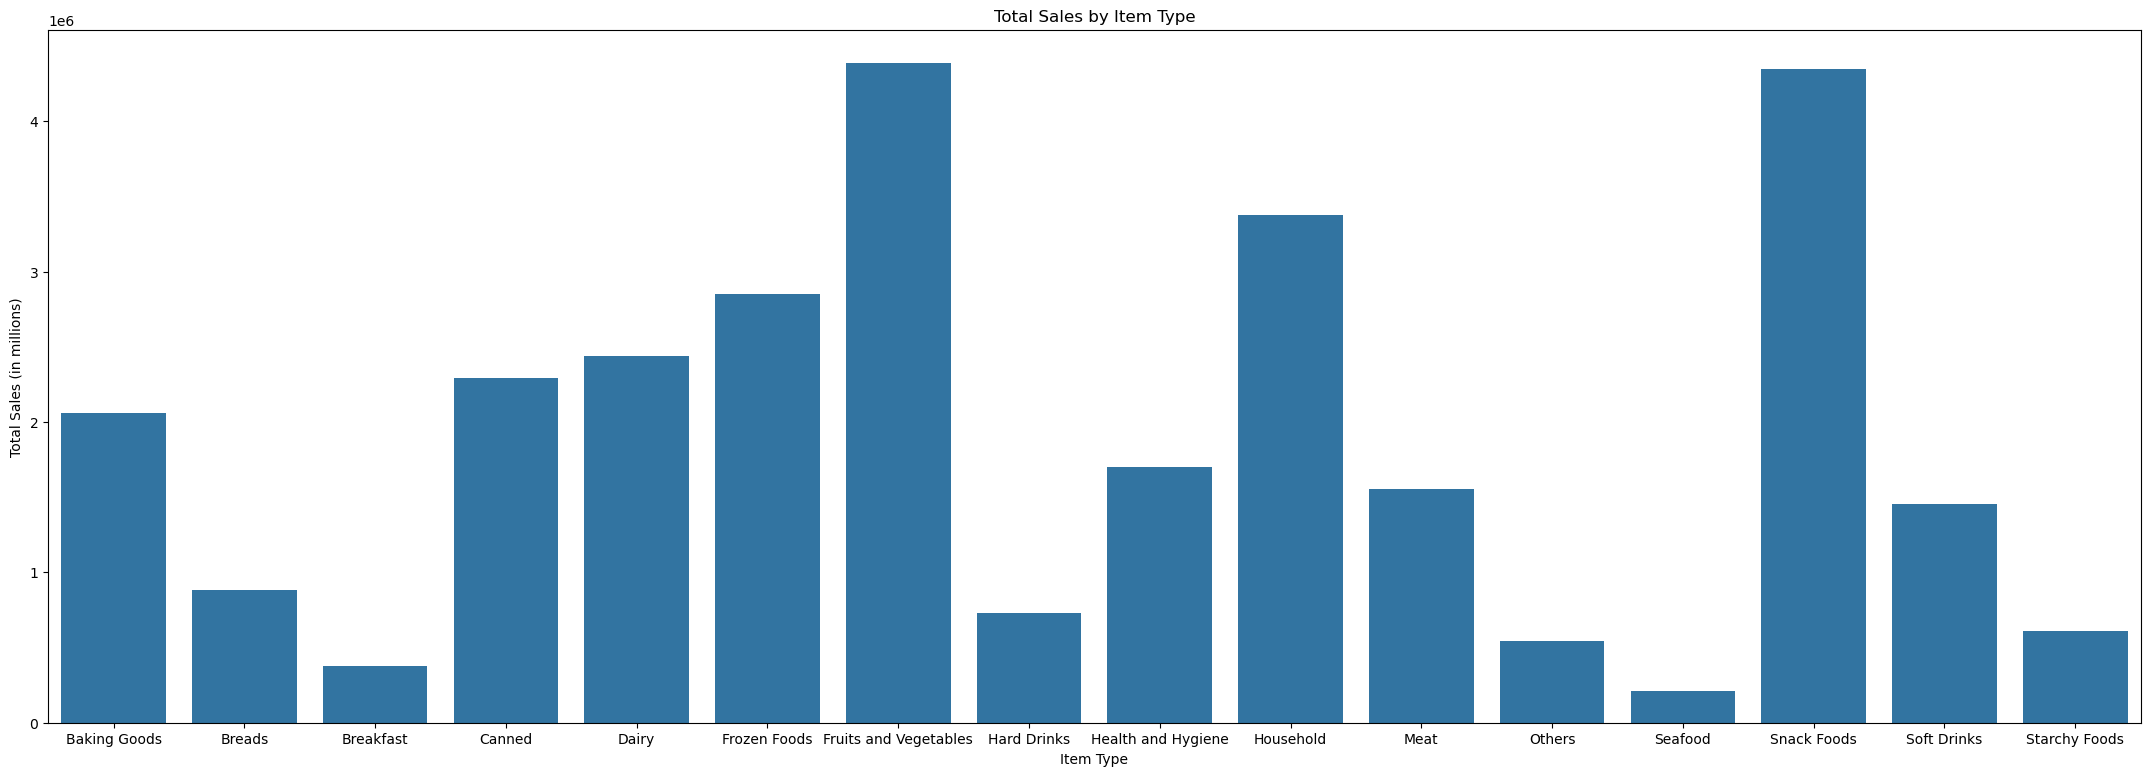

In [7]:
def filter_total_sales_by_item_type(data):
    """
    Takes in a data set containing sales data and return a filtered dataframe with total
    sales by item type.
    >>> result = filter_total_sales_by_item_type(testing)
    >>> pprint(result.to_dict())
    {'Item_Outlet_Sales': {'Dairy': 7464.9496,
                           'Frozen Foods': 4411.5908,
                           'Health and Hygiene': 745.696,
                           'Meat': 4447.544,
                           'Snack Foods': 1701.7848}}
    """
    
    columns = ["Item_Type", "Item_Outlet_Sales"]
    filtered_data = data[columns].groupby('Item_Type')['Item_Outlet_Sales'].sum().to_frame()
    return filtered_data
    
def plot_total_sales_by_item_type(data):
    """
    Takes in a data set containing sales data and return a bar plot showing total sales
    by item type.
    """
    filtered = filter_total_sales_by_item_type(data)
    plt.figure(figsize=(27, 9))
    bar = sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data = filtered)
    bar.set(title = "Total Sales by Item Type",
             xlabel = "Item Type",
             ylabel = "Total Sales (in millions)"
            )
    return bar
ax = plot_total_sales_by_item_type(data)
doctest.run_docstring_examples(filter_total_sales_by_item_type, globals())

*The bar plot of total sales by item type shows that certain item types significantly contribute to overall sales. For example, 
"Fruits and Vegetables," "Snack Foods," and "Household" items have higher total sales compared to other categories. This indicates
that these items are more popular among customers, leading to higher sales volumes.*

**Interpretation:** The lower sales in categories such as "Hard Drinks," "Seafood," and "Breakfast Foods" could be due to several factors:
- **Customer Preferences:** These items might not be as commonly purchased by the general customer base of BigMart compared to other everyday items.
- **Price Sensitivity:** Items like seafood might be priced higher, making them less attractive to a cost-sensitive market.
- **Perishability:** Seafood, being highly perishable, might not be stocked as extensively as other less perishable goods, leading to lower overall sales.
- **Market Demand:** Breakfast foods are very diverse depending on cultures and families, which might cause it to face stiff competition from other quick and convenient meal options, affecting their sales volumes.

### Research Question 2:

In [8]:
def filter_sales_by_store_age(data, current_year):
    """
    Takes in the current year and a data set containing sales data and filters it by store age and
    calculates the average sales for each store age.
    >>> result = filter_sales_by_store_age(testing, 2024)
    >>> pprint(result.to_dict())
    {22: 2026.0294000000001,
     25: 780.9834,
     26: 327.5736,
     27: 4119.9704,
     39: 3732.4748}
    """
    
    data['Store_Age'] = current_year - data['Outlet_Establishment_Year']
    avg_sales_by_store_age = data.groupby('Store_Age')['Item_Outlet_Sales'].mean()
    return avg_sales_by_store_age
    
def plot_sales_by_store_age(data):
    """
    Takes in a data set containing sales data and plot the sales data against store age.
    """
    filter_sales_by_store_age(data, 2024)
    scatter = px.scatter(data, x='Store_Age', y='Item_Outlet_Sales', title='Sales vs. Store Age')
    scatter.show(renderer='iframe')
    return scatter
ax = plot_sales_by_store_age(data)
doctest.run_docstring_examples(filter_sales_by_store_age, globals())

The scatter plot of sales versus store age reveals the relationship between the store's establishment year and its sales. Stores that are 39 years old have higher sales compared to stores that are 15-27 years old or 37 years old. This might be due to these stores having a well-established customer base and optimal operational strategies developed over time. Whereas, stores in younger age ranges might be experiencing various challenges, such as market competition or not having a good customer base due to being new. Notably, there are no data for stores that are between 28-36 years old.

**Interpretation:** The absence of data for stores that are between 28-36 years old could be due to several reasons:
- **Missing Records:** It is possible that records for stores within this age range are missing from the dataset due to data entry or collection issues or it could be that they don't exist at the time of data collection.
- **Business Issues:** There could be fewer stores established within this specific range due to business decisions or market conditions.

### Research Question 3:

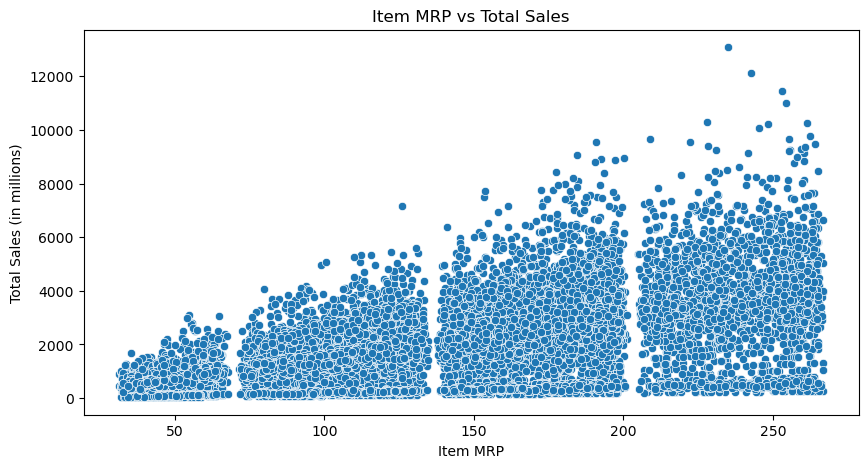

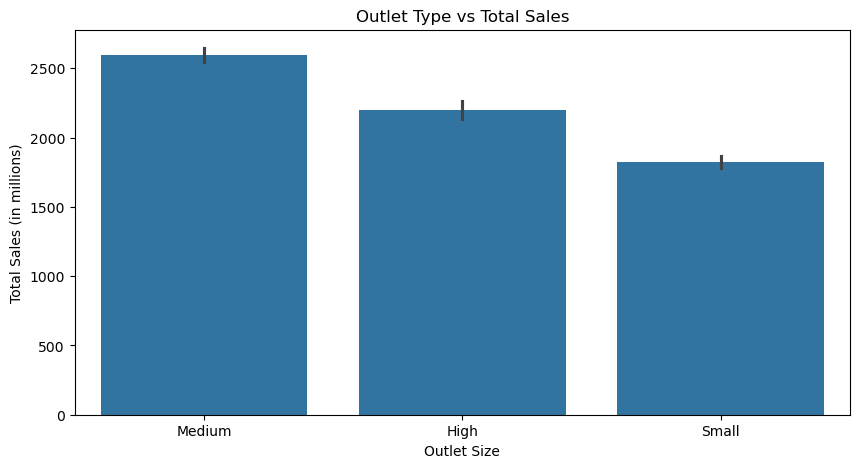

In [9]:
def predict_sale_strategy(data):
    """
    Takes in the data set and plot the relationship between Item MRP (price) and total
    sales using a scatterplot and the relationship between outlet size and total sales
    using bar plot.
    """
    
    plt.figure(figsize=(10, 5))
    scatter = sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data = data)
    scatter.set(title = 'Item MRP vs Total Sales',
             xlabel = 'Item MRP',
             ylabel = 'Total Sales (in millions)'
            )
    
    plt.figure(figsize=(10, 5))
    bar = sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data = data)
    bar.set(title = 'Outlet Type vs Total Sales',
             xlabel = 'Outlet Size',
             ylabel = 'Total Sales (in millions)'
            )
predict_sale_strategy(data)

The scatter plot of Item MRP (price) versus total sales shows that as Item MRP goes up, total sales also increase, suggesting that higher-priced items generally contribute more to higher sales. The bar plot of outlet size versus total sales indicates that medium outlet sizes have the highest total sales, followed by large and small outlet sizes. Note that the Outlet_Size columns had NULL categorical values but was chosen to not be included in the plot to avoid confusion and give a better visual representation.

#### Interesting Findings:

- **Increase Higher-priced Products Strategy:** The scatter plot of Item MRP (price) versus total sales shows that as Item MRP goes up, total sales also increase, suggesting that higher-priced items generally contribute more to higher sales.

- **Outlet Size Impact:** The bar plot of outlet size versus total sales indicates that medium outlet sizes have the highest total sales, followed by large and small outlet sizes. Note that the Outlet_Size columns had NULL categorical values but were chosen to not be included in the plot to avoid confusion and provide a better visual representation. Medium-sized outlets may benefit from a better customer experience, sufficient space for a variety of products, and an optimal store layout. Large outlets also perform well due to a more extensive range of products, but not as well as medium stores, as their size and vast product selection can overwhelm customers, making shopping more time-consuming. Meanwhile, small outlets have the lowest sales, likely due to limited space and product variety.

#### Optimal Retail Strategy:

Based on these findings, the optimal retail strategy would be to focus on medium-sized outlets and consider increasing the price slightly for high-demand products. Ensuring a diverse product mix that includes high-priced items could maximize sales across different store locations. Smaller outlets and larger outlets can focus on adjusting prices to become more reasonable and display their products better to emphasize items that drive sales.


### Research Question 4:

In [10]:
def test_sales_by_tier(data):
    """
    Takes in data from the dataset and performs one-way ANOVA to test if there is a significant
    difference in sales among different tiers of outlet locations.
    """
    
    tier1_sales = data[data['Outlet_Location_Type'] == 'Tier 1']['Item_Outlet_Sales']
    tier2_sales = data[data['Outlet_Location_Type'] == 'Tier 2']['Item_Outlet_Sales']
    tier3_sales = data[data['Outlet_Location_Type'] == 'Tier 3']['Item_Outlet_Sales']
    return stats.f_oneway(tier1_sales, tier2_sales, tier3_sales)
test_sales_by_tier(data)


F_onewayResult(statistic=108.74037862534861, pvalue=1.3571225054235083e-47)

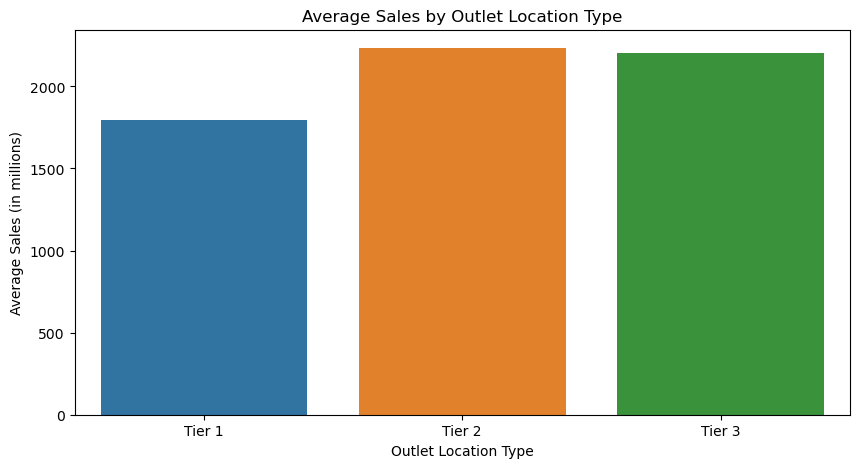

In [11]:
def filter_sales_by_location_type(data):
    """
    Takes in the sales data from the data set and filter it by outlet location type and then calculates
    the average sales for each location type
    >>> result = filter_sales_by_location_type(testing)
    >>> pprint(result.to_dict())
    {'Item_Outlet_Sales': {'Tier 1': 2450.4769,
                           'Tier 2': 2026.0294000000001,
                           'Tier 3': 2597.507733333333}}
    """
    location_sales = data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().to_frame()
    return location_sales
    
def plot_sales_by_location_type(data):
    """
    Takes in the sales data from the data set and plot the average sales by outet location type
    """

    location_sales = filter_sales_by_location_type(data)
    plt.figure(figsize=(10, 5))
    bar = sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue = 'Outlet_Location_Type', data=location_sales)
    bar.set(title='Average Sales by Outlet Location Type',
            xlabel='Outlet Location Type',
            ylabel='Average Sales (in millions)')
    return bar
ax = plot_sales_by_location_type(data)
doctest.run_docstring_examples(filter_sales_by_location_type, globals())

The one-way ANOVA test shows a p-value < 0.05, indicating that there is no significant difference in sales among different tiers of outlet locations, rejecting my hypothesis. However, the plot shows that Tier 2 and Tier 3 have quite similar averages, while Tier 1 is lower than both.

**Interpretation:** The discrepancy between the ANOVA test results and the plot observations can be explained by considering the following:
- **Effect Size:** Although Tier 1 appears lower than the others in the plot, the difference might not be large enough to be statistically significant, especially if the data within each tier is highly variable.
- **Data Distribution:** The sales data might not be normally distributed or might contain outliers. ANOVA assumes that the data is normally distributed and that variances are equal across groups. If these assumptions are violated, the test results might not accurately reflect the differences observed in the plot.
- **Variance and Sample Size:** If there is high variability within the sales data of each tier or an unequal sample size among the tiers, the ANOVA might not detect significant differences even if there are noticeable trends in the plot.

## Implications and Limitations

### Implications

#### Retail Strategy Optimization:
The insights from the analysis can help BigMart optimize its retail strategy by focusing on high-performing product categories, considemium pr increase. By reallocating resources towards popular product categories and discontinuing or repositioning underperforming items, BigMart can enhance overall profitability and customer satisfaction.

#### Competitive Positioning:
Understanding the impact of outlet size and outlet type on sales performance provides valuable insights into competitive positioning. By looking at the sales by outlet location type, businesses could start  and investinreasonable-sized rger outlets in high-sales loca so they can further drive revenue growth and improve customer satisfactiontiaction.

### Limitations

#### Temporal Relevance:
The dataset is from 2013, and customer preferences, market conditions, and competitive landscapes have likely changed since then. Future studies should use more recent data to ensure relevance.

#### Data Quality:
The dataset has missing values and inconsistencies that could affect the accuracy of the analysis. Careful data cleaning and validation are essential to ensure r There are 28% of NULL categorical data in Outlet_Size attribute and lack of stores within the age range 27-36 which could lead to inaccurate results and conclusions drawn from the analysis. eliableLack
#### Gran and Store Locationularity of Product Information:
The lack of detailed product names limits the ability to draw more specific conclusions about individual items. Including more granular p like specific names of product roduct information could enhance the dep Including a name of the city where the outlet is located can also provide context for stakeholders to understand geographic variations in sales patterns and customer preferences.th of the analysis.
of the analysis.
